# 2. Executing guanine-crystal-analysis-plugin from a jupyter notebook

The images shown were acquired in [Rita Mateus Laboratory](https://www.ritamateus.com/).

In [1]:
from guanine_crystal_analysis import normalization
from guanine_crystal_analysis import segmentation
from guanine_crystal_analysis import analyze_image
from guanine_crystal_analysis import classify_objects
from guanine_crystal_analysis import bad_label_exclusion
from guanine_crystal_analysis import analyze_deluxe
import os
import napari
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
import pyclesperanto_prototype as cle
import pandas as pd

In [2]:
tif_folder = 'imgs/1. mutant images/'

## Normalization

In [5]:
file_list = os.listdir(tif_folder)
file_list

['img2_20220520_mutant_56hpf_2.tif',
 'img3_l3_20220520_mutant_56hpf_3.tif',
 'img3_l5_20220520_mutant_56hpf_3.tif',
 'img4_l2_20220520_mutant_56hpf_4.tif',
 'img4_l4_20220520_mutant_56hpf_4.tif',
 'img5_l1_20220520_mutant_56hpf_5.tif']

In [10]:
normalization_folder = 'imgs/2. normalized images/'

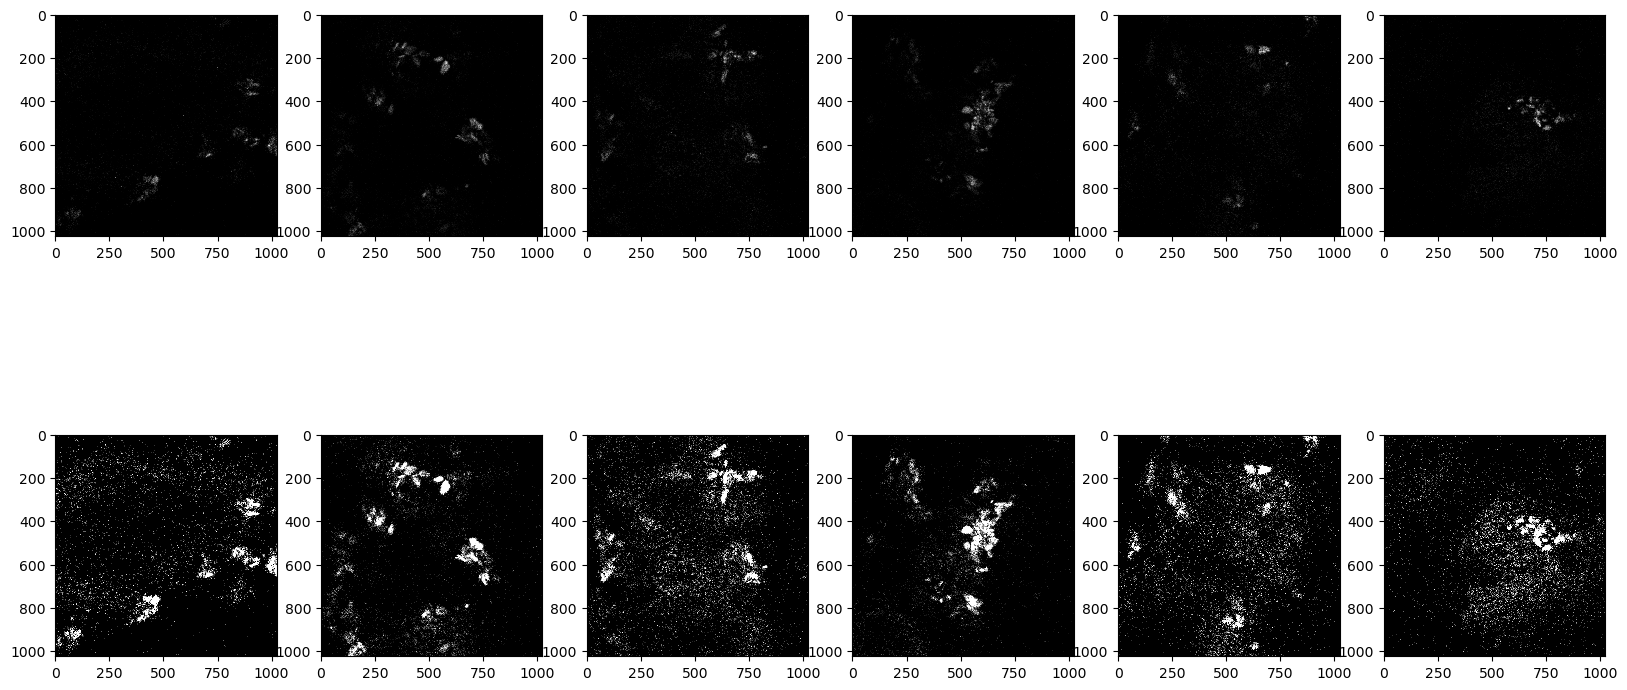

In [9]:
fig, axs = plt.subplots(2, 6, figsize=(20,10))
for i, filename in enumerate(file_list):
    #imread
    img  = imread(tif_folder + filename)
    cle.imshow(img, plot=axs[0,i])
    
    #normalize
    normalized_image = normalization(img)
    cle.imshow(normalized_image, plot=axs[1,i], max_display_intensity=1)
    
    #create normalization result folder and imsave
    os.makedirs(normalization_folder, exist_ok=True)
    imsave(normalization_folder + filename, normalized_image)

## Segmentation

In [16]:
segmentation_folder = 'imgs/3. segmentation labels/'

C:\Users\maral\Documents\GitHub\guanine-crystal-analysis\src\guanine_crystal_analysis\cl_segmenter\object_segmenter_20220523_sorted.cl


C:\Users\maral\AppData\Local\Temp\ipykernel_14956\2786799452.py:13: UserWarning: imgs/3. segmentation labels/img2_20220520_mutant_56hpf_2.tif is a low contrast image
  imsave(segmentation_folder + filename, segmented_image)


C:\Users\maral\Documents\GitHub\guanine-crystal-analysis\src\guanine_crystal_analysis\cl_segmenter\object_segmenter_20220523_sorted.cl


C:\Users\maral\AppData\Local\Temp\ipykernel_14956\2786799452.py:13: UserWarning: imgs/3. segmentation labels/img3_l3_20220520_mutant_56hpf_3.tif is a low contrast image
  imsave(segmentation_folder + filename, segmented_image)


C:\Users\maral\Documents\GitHub\guanine-crystal-analysis\src\guanine_crystal_analysis\cl_segmenter\object_segmenter_20220523_sorted.cl


C:\Users\maral\AppData\Local\Temp\ipykernel_14956\2786799452.py:13: UserWarning: imgs/3. segmentation labels/img3_l5_20220520_mutant_56hpf_3.tif is a low contrast image
  imsave(segmentation_folder + filename, segmented_image)


C:\Users\maral\Documents\GitHub\guanine-crystal-analysis\src\guanine_crystal_analysis\cl_segmenter\object_segmenter_20220523_sorted.cl


C:\Users\maral\AppData\Local\Temp\ipykernel_14956\2786799452.py:13: UserWarning: imgs/3. segmentation labels/img4_l2_20220520_mutant_56hpf_4.tif is a low contrast image
  imsave(segmentation_folder + filename, segmented_image)


C:\Users\maral\Documents\GitHub\guanine-crystal-analysis\src\guanine_crystal_analysis\cl_segmenter\object_segmenter_20220523_sorted.cl


C:\Users\maral\AppData\Local\Temp\ipykernel_14956\2786799452.py:13: UserWarning: imgs/3. segmentation labels/img4_l4_20220520_mutant_56hpf_4.tif is a low contrast image
  imsave(segmentation_folder + filename, segmented_image)


C:\Users\maral\Documents\GitHub\guanine-crystal-analysis\src\guanine_crystal_analysis\cl_segmenter\object_segmenter_20220523_sorted.cl


C:\Users\maral\AppData\Local\Temp\ipykernel_14956\2786799452.py:13: UserWarning: imgs/3. segmentation labels/img5_l1_20220520_mutant_56hpf_5.tif is a low contrast image
  imsave(segmentation_folder + filename, segmented_image)


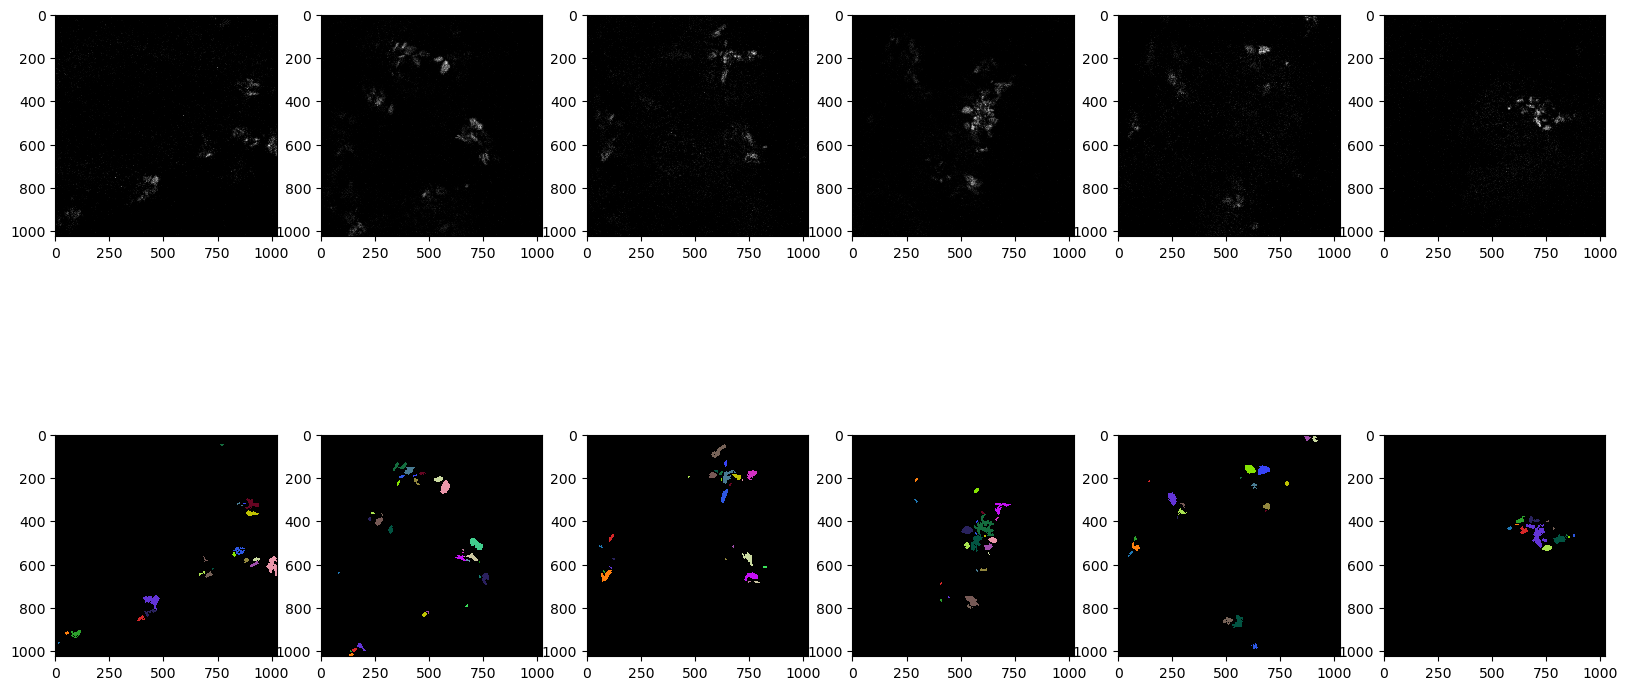

In [17]:
fig, axs = plt.subplots(2, 6, figsize=(20,10))
for i, filename in enumerate(file_list):
    #imread
    normalized_image = imread(normalization_folder + filename)
    cle.imshow(normalized_image, plot=axs[0,i])
    
    #segment
    segmented_image = segmentation(normalized_image, segmenter = 'object_segmenter_20220523_sorted.cl', minimum_pixel_count = 50)
    cle.imshow(segmented_image, plot=axs[1,i], labels = True)
    
    #create segmentation result folder and imsave
    os.makedirs(segmentation_folder, exist_ok=True)
    imsave(segmentation_folder + filename, segmented_image)

## Measurements

In [20]:
df_folder = 'imgs/4. dataframes of segmentation labels/'

In [21]:
for i, filename in enumerate(file_list):
    #imread
    segmented_image = imread(segmentation_folder + filename)
    
    #measure
    df = analyze_image(normalized_image, segmented_image, napari_viewer = None)
    
    #create df result folder and save
    os.makedirs(df_folder, exist_ok=True)
    df.to_csv(df_folder + filename + ".csv")
df

PROPERTIES =  ['label', 'area', 'bbox_area', 'equivalent_diameter', 'convex_area', 'max_intensity', 'mean_intensity', 'min_intensity', 'perimeter', 'perimeter_crofton', 'extent', 'local_centroid', 'solidity', 'feret_diameter_max', 'major_axis_length', 'minor_axis_length', 'orientation', 'eccentricity']
PROPERTIES =  ['label', 'area', 'bbox_area', 'equivalent_diameter', 'convex_area', 'max_intensity', 'mean_intensity', 'min_intensity', 'perimeter', 'perimeter_crofton', 'extent', 'local_centroid', 'solidity', 'feret_diameter_max', 'major_axis_length', 'minor_axis_length', 'orientation', 'eccentricity']
PROPERTIES =  ['label', 'area', 'bbox_area', 'equivalent_diameter', 'convex_area', 'max_intensity', 'mean_intensity', 'min_intensity', 'perimeter', 'perimeter_crofton', 'extent', 'local_centroid', 'solidity', 'feret_diameter_max', 'major_axis_length', 'minor_axis_length', 'orientation', 'eccentricity']
PROPERTIES =  ['label', 'area', 'bbox_area', 'equivalent_diameter', 'convex_area', 'max_

,label,area,bbox_area,equivalent_diameter,convex_area,max_intensity,mean_intensity,min_intensity,perimeter_skimage,perimeter_crofton,...,roundness_simpleitk,equivalent_ellipsoid_diameter_0,equivalent_ellipsoid_diameter_1,equivalent_spherical_perimeter,equivalent_spherical_radius,number_of_pixels,number_of_pixels_on_border,perimeter_simpleitk,perimeter_on_border,perimeter_on_border_ratio
0,1,303,437,19.641578,346,10.000000,2.512651,0.0,71.355339,70.330620,...,0.877368,16.891580,22.839283,61.705837,9.820789,303,0,70.330620,0.0,0.0
1,2,81,152,10.155413,105,2.333333,0.973251,0.0,45.798990,49.568597,...,0.643637,5.945834,17.345323,31.904169,5.077706,81,0,49.568597,0.0,0.0
2,3,768,1505,31.270561,974,10.833333,2.236762,0.0,159.059921,153.513466,...,0.639940,21.561695,45.351165,98.239364,15.635280,768,0,153.513466,0.0,0.0
3,4,772,1369,31.351889,1020,6.000000,1.578152,0.0,177.580736,167.801734,...,0.586972,30.576908,32.146512,98.494863,15.675944,772,0,167.801734,0.0,0.0
4,5,4128,11413,72.497813,8099,12.000000,2.607437,0.0,691.417352,676.895293,...,0.336475,55.780195,94.225788,227.758596,36.248906,4128,0,676.895293,0.0,0.0
5,6,841,1734,32.722996,1246,7.666667,1.917558,0.0,182.823376,176.401646,...,0.582774,22.901567,46.756384,102.802323,16.361498,841,0,176.401646,0.0,0.0
6,7,1018,1488,36.002192,1114,8.000000,2.777177,0.0,134.225397,131.275931,...,0.861576,28.473774,45.521112,113.104223,18.001096,1018,0,131.275931,0.0,0.0
7,8,131,170,12.914890,147,3.666667,1.174300,0.0,50.384776,50.449280,...,0.804240,9.485801,17.583584,40.573323,6.457445,131,0,50.449280,0.0,0.0
8,9,68,130,9.304853,88,2.833333,1.078431,0.0,36.935029,39.072567,...,0.748148,7.300304,11.859820,29.232058,4.652426,68,0,39.072567,0.0,0.0
9,10,1536,2790,44.223251,1933,10.166667,2.015191,0.0,215.687338,209.095743,...,0.664439,34.318794,56.986151,138.931441,22.111626,1536,0,209.095743,0.0,0.0


## Classification

In [22]:
classification_folder = 'imgs/5. classification labels/'

alle keys: Index(['Unnamed: 0', 'label', 'area', 'bbox_area', 'equivalent_diameter',
       'convex_area', 'max_intensity', 'mean_intensity', 'min_intensity',
       'perimeter_skimage', 'perimeter_crofton', 'solidity',
       'feret_diameter_max', 'major_axis_length', 'minor_axis_length',
       'eccentricity', 'standard_deviation_intensity', 'aspect_ratio',
       'roundness_skimage', 'circularity', 'maximum', 'mean', 'median',
       'minimum', 'sigma', 'sum', 'variance', 'elongation', 'feret_diameter',
       'flatness', 'roundness_simpleitk', 'equivalent_ellipsoid_diameter_0',
       'equivalent_ellipsoid_diameter_1', 'equivalent_spherical_perimeter',
       'equivalent_spherical_radius', 'number_of_pixels',
       'number_of_pixels_on_border', 'perimeter_simpleitk',
       'perimeter_on_border', 'perimeter_on_border_ratio'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
selected keys: Index(['label', 'aspect_ratio', 'perimeter_skimage', 'major_axis_length',
       '

C:\Users\maral\AppData\Local\Temp\ipykernel_14956\2627386228.py:15: UserWarning: imgs/5. classification labels/img2_20220520_mutant_56hpf_2.tif is a low contrast image
  imsave(classification_folder + filename, classified_labels)
C:\Users\maral\AppData\Local\Temp\ipykernel_14956\2627386228.py:15: UserWarning: imgs/5. classification labels/img3_l3_20220520_mutant_56hpf_3.tif is a low contrast image
  imsave(classification_folder + filename, classified_labels)
C:\Users\maral\AppData\Local\Temp\ipykernel_14956\2627386228.py:15: UserWarning: imgs/5. classification labels/img3_l5_20220520_mutant_56hpf_3.tif is a low contrast image
  imsave(classification_folder + filename, classified_labels)
C:\Users\maral\AppData\Local\Temp\ipykernel_14956\2627386228.py:15: UserWarning: imgs/5. classification labels/img4_l2_20220520_mutant_56hpf_4.tif is a low contrast image
  imsave(classification_folder + filename, classified_labels)
C:\Users\maral\AppData\Local\Temp\ipykernel_14956\2627386228.py:15: Use

alle keys: Index(['Unnamed: 0', 'label', 'area', 'bbox_area', 'equivalent_diameter',
       'convex_area', 'max_intensity', 'mean_intensity', 'min_intensity',
       'perimeter_skimage', 'perimeter_crofton', 'solidity',
       'feret_diameter_max', 'major_axis_length', 'minor_axis_length',
       'eccentricity', 'standard_deviation_intensity', 'aspect_ratio',
       'roundness_skimage', 'circularity', 'maximum', 'mean', 'median',
       'minimum', 'sigma', 'sum', 'variance', 'elongation', 'feret_diameter',
       'flatness', 'roundness_simpleitk', 'equivalent_ellipsoid_diameter_0',
       'equivalent_ellipsoid_diameter_1', 'equivalent_spherical_perimeter',
       'equivalent_spherical_radius', 'number_of_pixels',
       'number_of_pixels_on_border', 'perimeter_simpleitk',
       'perimeter_on_border', 'perimeter_on_border_ratio'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
selected keys: Index(['label', 'aspect_ratio', 'perimeter_skimage', 'major_axis_length',
       '

C:\Users\maral\AppData\Local\Temp\ipykernel_14956\2627386228.py:15: UserWarning: imgs/5. classification labels/img5_l1_20220520_mutant_56hpf_5.tif is a low contrast image
  imsave(classification_folder + filename, classified_labels)


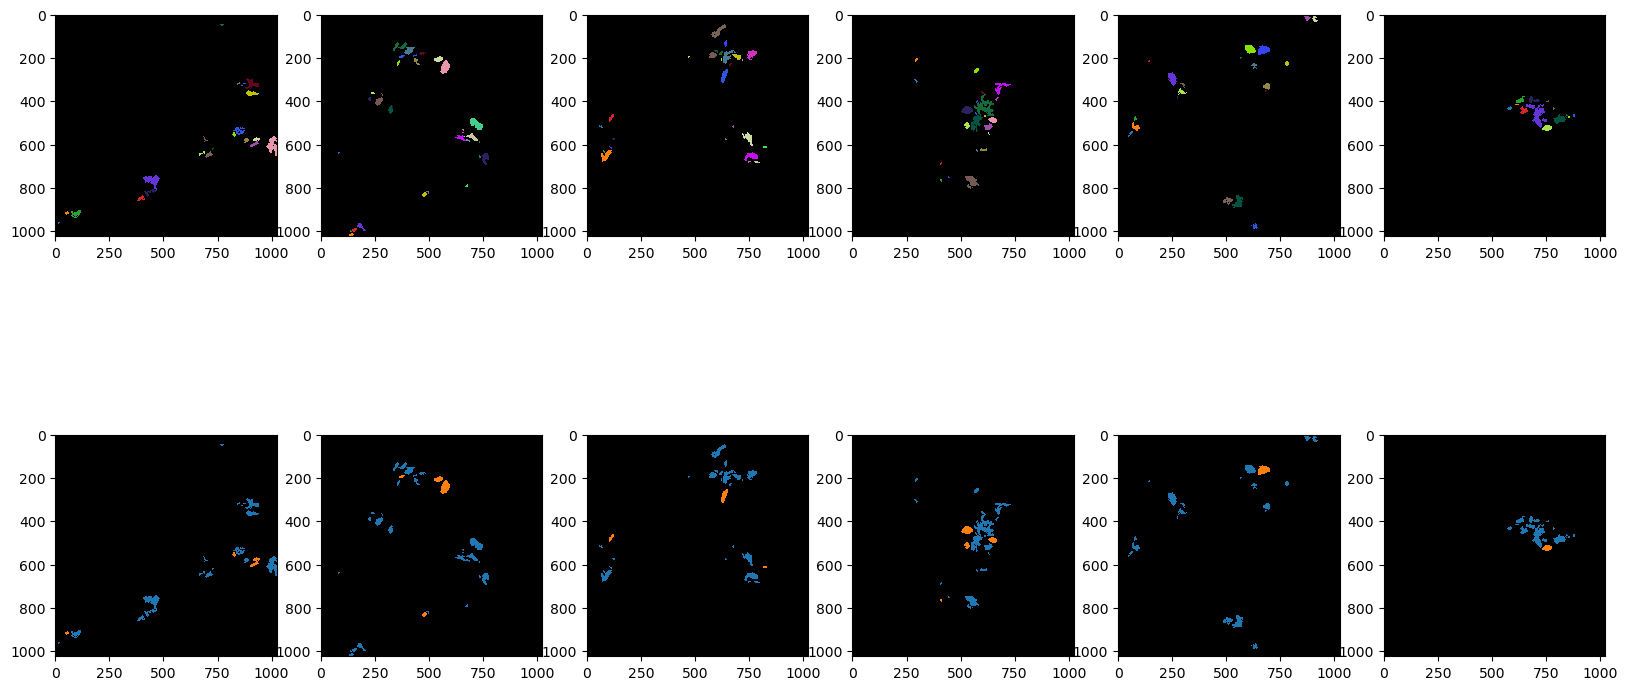

In [23]:
fig, axs = plt.subplots(2, 6, figsize=(20,10))
for i, filename in enumerate(file_list):
    #imread
    segmented_image = imread(segmentation_folder + filename)
    cle.imshow(segmented_image, plot=axs[0,i], labels = True)
    
    df = pd.read_csv(df_folder + filename + ".csv")
    
    #classify
    classified_labels = classify_objects(segmented_image, intensity = False, shape = True, size = True, classifier_filename = 'object_classifier_20220523_', table = df, napari_viewer = None)
    cle.imshow(classified_labels, plot=axs[1,i], labels = True)
    
    #create segmentation result folder and imsave
    os.makedirs(classification_folder, exist_ok=True)
    imsave(classification_folder + filename, classified_labels)

## Exclude discarded labels (DL)

In [7]:
dl_exclusion_folder = 'imgs/6. bad-label-excluded labels/'

C:\Users\maral\AppData\Local\Temp\ipykernel_14956\3702400.py:14: UserWarning: imgs/6. bad-label-excluded labels/img2_20220520_mutant_56hpf_2.tif is a low contrast image
  imsave(dl_exclusion_folder + filename, dl_exclusion)
C:\Users\maral\AppData\Local\Temp\ipykernel_14956\3702400.py:14: UserWarning: imgs/6. bad-label-excluded labels/img3_l3_20220520_mutant_56hpf_3.tif is a low contrast image
  imsave(dl_exclusion_folder + filename, dl_exclusion)
C:\Users\maral\AppData\Local\Temp\ipykernel_14956\3702400.py:14: UserWarning: imgs/6. bad-label-excluded labels/img3_l5_20220520_mutant_56hpf_3.tif is a low contrast image
  imsave(dl_exclusion_folder + filename, dl_exclusion)
C:\Users\maral\AppData\Local\Temp\ipykernel_14956\3702400.py:14: UserWarning: imgs/6. bad-label-excluded labels/img4_l2_20220520_mutant_56hpf_4.tif is a low contrast image
  imsave(dl_exclusion_folder + filename, dl_exclusion)
C:\Users\maral\AppData\Local\Temp\ipykernel_14956\3702400.py:14: UserWarning: imgs/6. bad-label

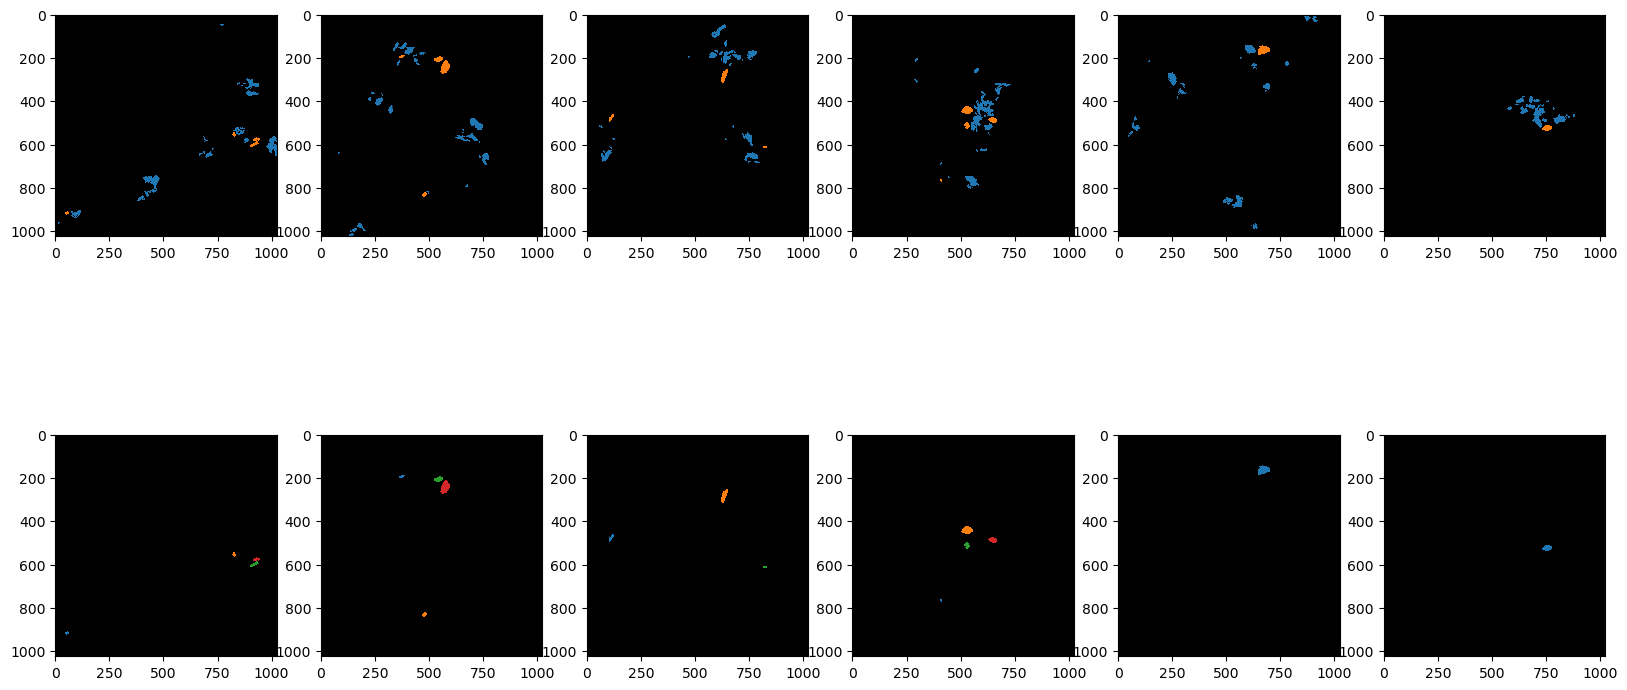

In [25]:
fig, axs = plt.subplots(2, 6, figsize=(20,10))
for i, filename in enumerate(file_list):
    #imread
    segmented_image = imread(segmentation_folder + filename)
    classified_labels = imread(classification_folder + filename)
    cle.imshow(classified_labels, plot=axs[0,i], labels = True)
    
    #classify
    dl_exclusion = bad_label_exclusion(segmented_image, classified_labels)
    cle.imshow(dl_exclusion, plot=axs[1,i], labels = True)
    
    #create segmentation result folder and imsave
    os.makedirs(dl_exclusion_folder, exist_ok=True)
    imsave(dl_exclusion_folder + filename, dl_exclusion)

# Measure on predicted labels (PL)

In [8]:
df_folder_PL = 'imgs/7. dataframes of PL/'

In [12]:
for i, filename in enumerate(file_list):
    #imread
    normalized_image = imread(normalization_folder + filename)
    PL_image = imread(dl_exclusion_folder + filename)
    
    #measure
    df = analyze_image(normalized_image, PL_image, napari_viewer = None)
    
    #create df result folder and save
    os.makedirs(df_folder_PL, exist_ok=True)
    df.to_csv(df_folder_PL + filename + ".csv")
df

PROPERTIES =  ['label', 'area', 'bbox_area', 'equivalent_diameter', 'convex_area', 'max_intensity', 'mean_intensity', 'min_intensity', 'perimeter', 'perimeter_crofton', 'extent', 'local_centroid', 'solidity', 'feret_diameter_max', 'major_axis_length', 'minor_axis_length', 'orientation', 'eccentricity']
PROPERTIES =  ['label', 'area', 'bbox_area', 'equivalent_diameter', 'convex_area', 'max_intensity', 'mean_intensity', 'min_intensity', 'perimeter', 'perimeter_crofton', 'extent', 'local_centroid', 'solidity', 'feret_diameter_max', 'major_axis_length', 'minor_axis_length', 'orientation', 'eccentricity']
PROPERTIES =  ['label', 'area', 'bbox_area', 'equivalent_diameter', 'convex_area', 'max_intensity', 'mean_intensity', 'min_intensity', 'perimeter', 'perimeter_crofton', 'extent', 'local_centroid', 'solidity', 'feret_diameter_max', 'major_axis_length', 'minor_axis_length', 'orientation', 'eccentricity']
PROPERTIES =  ['label', 'area', 'bbox_area', 'equivalent_diameter', 'convex_area', 'max_

,label,area,bbox_area,equivalent_diameter,convex_area,max_intensity,mean_intensity,min_intensity,perimeter_skimage,perimeter_crofton,...,roundness_simpleitk,equivalent_ellipsoid_diameter_0,equivalent_ellipsoid_diameter_1,equivalent_spherical_perimeter,equivalent_spherical_radius,number_of_pixels,number_of_pixels_on_border,perimeter_simpleitk,perimeter_on_border,perimeter_on_border_ratio
0,1,1018,1488,36.002192,1114,8.0,2.777177,0.0,134.225397,131.275931,...,0.861576,28.473774,45.521112,113.104223,18.001096,1018,0,131.275931,0.0,0.0
